(7676, 4)
Rows dropped due to NA values: 950
(6726, 4)


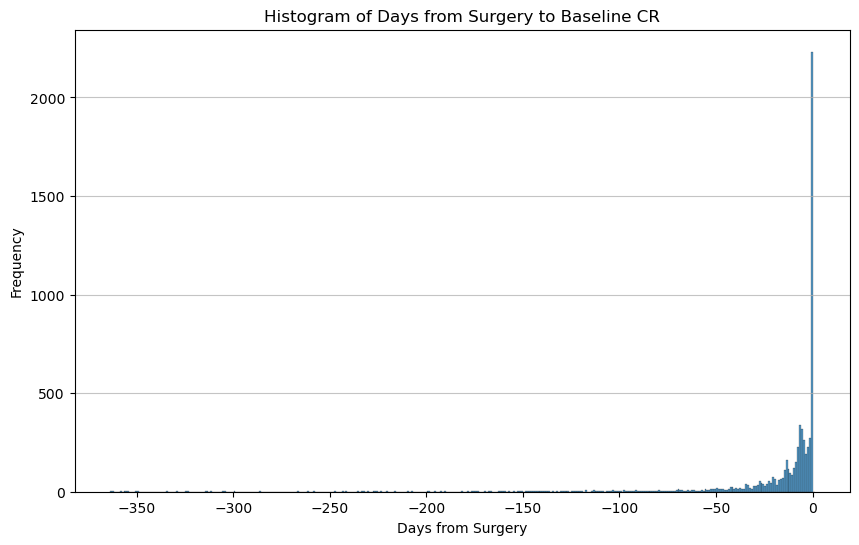

Rows dropped due to Day0 data source removal: 1852


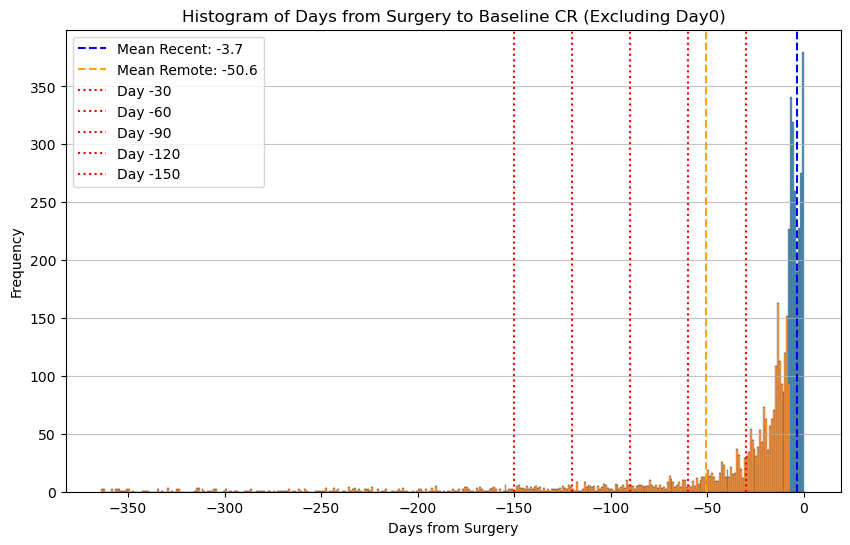

Rows to drop if cutoff at -90 days: 445
Rows kept if cutoff at -90 days: 4429
Rows to drop if cutoff at -120 days: 321
Rows kept if cutoff at -120 days: 4553
Rows to drop if cutoff at -150 days: 232
Rows kept if cutoff at -150 days: 4642


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("days from surgery to baseline cr.csv")
print(df.shape)
df_rows = df.shape[0]
df = df.dropna()
print(f"Rows dropped due to NA values: {df_rows - df.shape[0]}")
df_rows = df.shape[0]
print(df.shape)

# Plot histogram of "days_from_surgery" column with daily frequency bins
plt.figure(figsize=(10, 6))
sns.histplot(
    df["days_from_surgery"],
    bins=np.arange(df["days_from_surgery"].min(), df["days_from_surgery"].max() + 2)
    - 0.5,
    kde=False,
)
plt.title("Histogram of Days from Surgery to Baseline CR")
plt.xlabel("Days from Surgery")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

# drop data_source="Day0" and re-plot with color highlight for data_source="Recent" or "Remote"
# and include lines to indicate the mean days_from_surgery for each data_source and lines to indicate days =30, 60, 90, 120, 150
print(
    "Rows dropped due to Day0 data source removal:",
    df[df["data_source"] == "Day0"].shape[0],
)
df_filtered = df[df["data_source"] != "Day0"]
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_filtered,
    x="days_from_surgery",
    bins=np.arange(
        df_filtered["days_from_surgery"].min(),
        df_filtered["days_from_surgery"].max() + 2,
    )
    - 0.5,
    hue="data_source",
    multiple="stack",
    kde=False,
)
mean_recent = df_filtered[df_filtered["data_source"] == "Recent"][
    "days_from_surgery"
].mean()
mean_remote = df_filtered[df_filtered["data_source"] == "Remote"][
    "days_from_surgery"
].mean()
plt.axvline(
    mean_recent, color="blue", linestyle="--", label=f"Mean Recent: {mean_recent:.1f}"
)
plt.axvline(
    mean_remote, color="orange", linestyle="--", label=f"Mean Remote: {mean_remote:.1f}"
)
for day in [-30, -60, -90, -120, -150]:
    plt.axvline(day, color="red", linestyle=":", label=f"Day {day}")
plt.title("Histogram of Days from Surgery to Baseline CR (Excluding Day0)")
plt.xlabel("Days from Surgery")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.show()

# numbers to drop if we cutoff days_from_surgery at -90, -120, -150 and report the number of rows kept if we choose each cutoff
for cutoff in [-90, -120, -150]:
    rows_to_drop = df_filtered[df_filtered["days_from_surgery"] < cutoff].shape[0]
    rows_kept = df_filtered.shape[0] - rows_to_drop
    print(f"Rows to drop if cutoff at {cutoff} days: {rows_to_drop}")
    print(f"Rows kept if cutoff at {cutoff} days: {rows_kept}")